Import Libraries 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

Importing data files

In [76]:
df = pd.read_csv('D:\BI\Python\Python Assignment 2\Ecommerce - UK Retailer.csv',encoding= 'unicode_escape')
df.head(11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


To get information about datatypes

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Before doing basis EDA we have to clean the Data to get accurate results

Task 2.  Check for missing values in all columns and replace them with the appropriate metric
(Mean/Median/Mode)

In [41]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [42]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

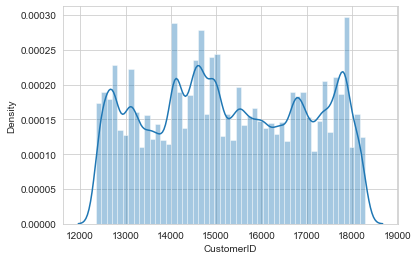

In [78]:
sns.distplot(df["CustomerID"])

As the data distribution is symmetric the appropriate metric is mean .So, we have to replace missing values with mean

In [79]:
x=df["CustomerID"].mean()
type(x)

numpy.float64

In [80]:
int(x)


15287

In [81]:
df['CustomerID']=df["CustomerID"].fillna(x)

In [83]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Description    1454
InvoiceNo         0
StockCode         0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [84]:
df1 = df.dropna()

In [86]:
df1.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  float64
 7   Country      540455 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB


Task 3. Remove duplicate rows

In [89]:
df1[df1.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [90]:
df1.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  float64
 7   Country      540455 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB


Task 4. Remove rows which have negative values in Quantity column

In [92]:
df_new = df1[(df1['Quantity'] >= 0)]

In [93]:
#Check for missing values in all columns and replace them with the appropriate metric
# In our data there is no missing/blank value in main column 'Quantity','UnitPrice','Country','InvoiceDate'
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530693 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530693 non-null  object 
 1   StockCode    530693 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     530693 non-null  int64  
 4   InvoiceDate  530693 non-null  object 
 5   UnitPrice    530693 non-null  float64
 6   CustomerID   530693 non-null  float64
 7   Country      530693 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


Task 5. Add the columns - Month, Day and Hour for the invoice

In [94]:
#Add the columns - Month, Day and Hour for the invoice
df_new['InvoiceDate'] = df_new['InvoiceDate'].astype('datetime64[ns]')
df_new['Year'] = df_new.InvoiceDate.dt.year
df_new['Month'] = df_new.InvoiceDate.dt.month
df_new['year_month']=df_new.InvoiceDate.map(lambda x: 100*x.year + x.month)
df_new['Day']=(df_new.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
df_new['Hour'] = df_new.InvoiceDate.dt.hour
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


task 1. Perform basic EDA

a. Box Plot - All numerical variables

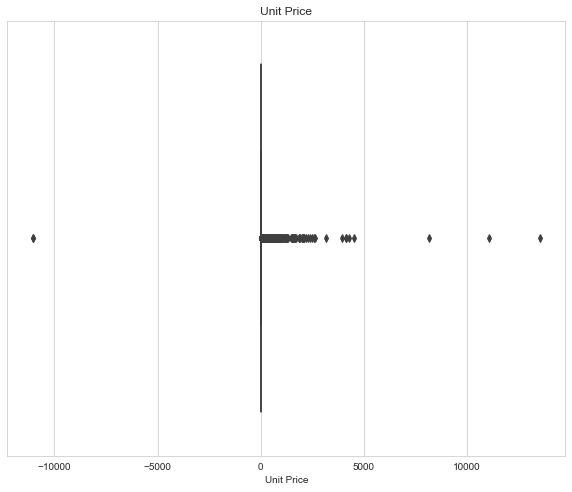

In [95]:
plt.subplots(figsize=(10,8))
sns.boxplot(df_new.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.show()

b.Histogram – All Numeric Variables

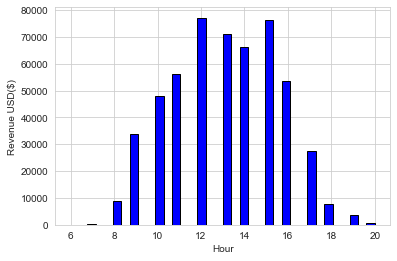

In [97]:
plt.hist(df_new['Hour'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Hour')
plt.ylabel('Revenue USD($)')
plt.show()

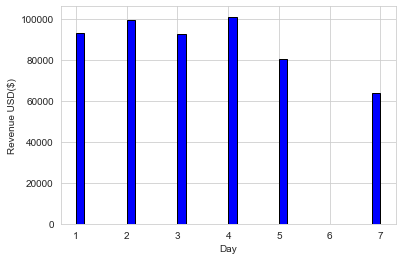

In [98]:
plt.hist(df_new['Day'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Day')
plt.ylabel('Revenue USD($)')
plt.show()

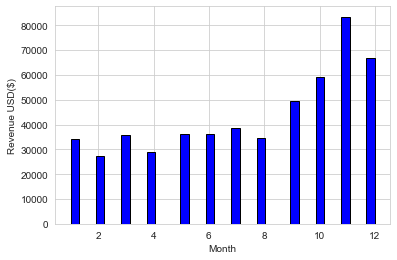

In [102]:
plt.hist(df_new['Month'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Month')
plt.ylabel('Revenue USD($)')
plt.show()

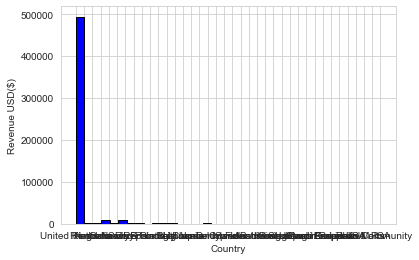

In [103]:
plt.hist(df_new['Country'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Country')
plt.ylabel('Revenue USD($)')
plt.show()

c. Distribution Plot – All Numeric Variables

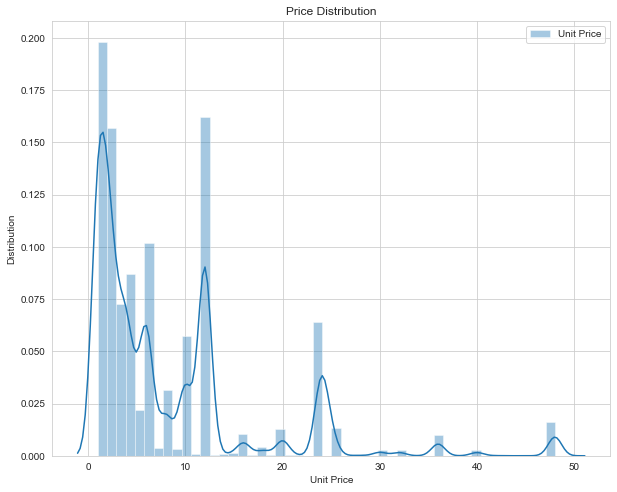

In [66]:
# distribition plot (Skewed +ve)
# If a data set has a positive skew, 
# but the mean of the returns is negative, it means that overall performance is negative
# but here mean is positive hence performance is considerd as to be good
plt.subplots(figsize=(10,8))
sns.distplot(df_new.Quantity[df_new.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

d. Aggregation for all numerical Columns

In [67]:
df_new.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,year_month,Day,Hour,Revenue
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,2010.934259,7.612537,201101.038417,3.614555,12.728247,22.394749
std,180.420210,22.096788,1713.169877,0.247829,3.416527,23.836517,1.928274,2.273535,309.055588
min,1.000000,0.000000,12346.000000,2010.000000,1.000000,201012.000000,1.000000,6.000000,0.000000
25%,2.000000,1.250000,13969.000000,2011.000000,5.000000,201104.000000,2.000000,11.000000,4.680000
50%,6.000000,1.950000,15159.000000,2011.000000,8.000000,201107.000000,3.000000,13.000000,11.800000
75%,12.000000,3.750000,16795.000000,2011.000000,11.000000,201110.000000,5.000000,14.000000,19.800000
max,80995.000000,8142.750000,18287.000000,2011.000000,12.000000,201112.000000,7.000000,20.000000,168469.600000


e. Unique Values across all columns

In [104]:
#.ravel(): as below
#returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
pd.unique(df_new[['Country','Description','StockCode','Country']].values.ravel())

array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE', '23843'], dtype=object)

In [105]:
df_new.nunique(axis=0)

InvoiceNo      20136
StockCode       3925
Description     4077
Quantity         383
InvoiceDate    18641
UnitPrice       1293
CustomerID      4340
Country           38
Year               2
Month             12
year_month        13
Day                6
Hour              15
Revenue         4908
dtype: int64

f. Duplicate values across all columns

In [106]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


g. Correlation – Heatmap - All Numeric Variables

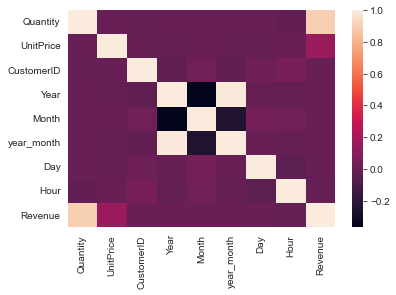

In [107]:
sns.heatmap(df_new.corr())
plt.show()

h. Regression Plot - All Numeric Variables

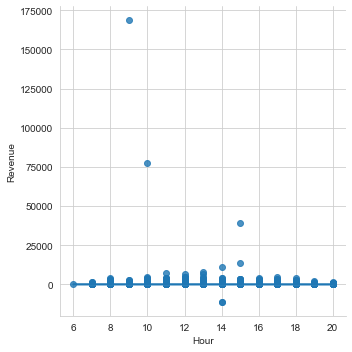

In [153]:
sns.set_style('whitegrid')
sns.lmplot(x ='Hour', y ='Revenue', data = df_new)

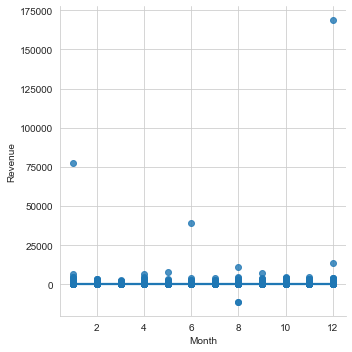

In [156]:
sns.set_style('whitegrid')
sns.lmplot(x ='Month', y ='Revenue', data = df_new)

i. Bar Plot – Every Categorical Variable vs every Numerical Variable

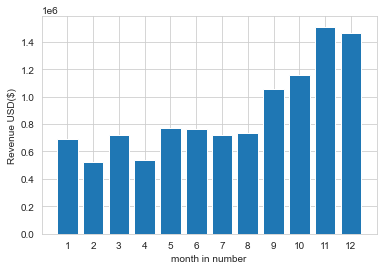

In [112]:
result=df_new.groupby('Month').sum()
month=range(1,13)
plt.bar(month,result['Revenue'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Revenue USD($)')
plt.show()

j. Pair plot - All Numeric Variables

In [ ]:
sns.pairplot(df_new,vars=["Quantity","UnitPrice","Revenue"])
plt.show()

k. Line chart to show the trend of data - All Numeric/Date Variables

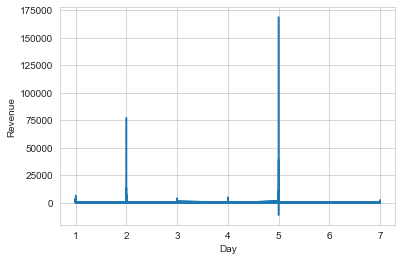

In [114]:
plt.plot(df_new['Day'],df_new['Revenue'])
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

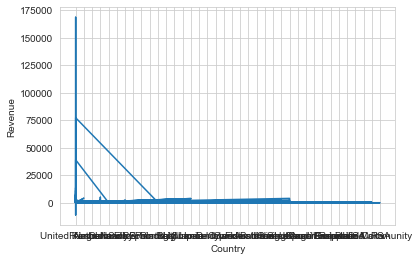

In [125]:
plt.plot(df_new['Country'],df_new['Revenue'])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

l. Plot the skewness - All Numeric Variables

In [126]:
df_new.skew(axis=0,skipna=True)

Quantity      462.249528
UnitPrice      60.519704
CustomerID      0.033119
Year           -3.136251
Month          -0.418225
year_month     -3.048246
Day             0.466696
Hour            0.000660
Revenue       501.942998
dtype: float64

In [127]:
df_new.skew(axis=1,skipna=True)

0         2.957284
1         2.957288
2         2.957290
3         2.957288
4         2.957288
            ...   
541904    2.978223
541905    2.978222
541906    2.978224
541907    2.978224
541908    2.978223
Length: 530693, dtype: float64

Task 6. How many orders made by the customers?

In [130]:
index = pd.Index(df_new['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 530693


In [131]:
total_order=df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(11)
print(total_order)

    CustomerID         Country  InvoiceNo
0      12346.0  United Kingdom          1
1      12347.0         Iceland        182
2      12348.0         Finland         31
3      12349.0           Italy         73
4      12350.0          Norway         17
5      12352.0          Norway         85
6      12353.0         Bahrain          4
7      12354.0           Spain         58
8      12355.0         Bahrain         13
9      12356.0        Portugal         59
10     12357.0     Switzerland        131


Task 7. TOP 5 customers with higher number of orders

In [132]:
total_order.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
10,12357.0,Switzerland,131
5,12352.0,Norway,85
3,12349.0,Italy,73
9,12356.0,Portugal,59


Task 8. How much money spent by the customers?

In [133]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['Revenue'].sum()
print(money_spent)

      CustomerID         Country   Revenue
0        12346.0  United Kingdom  77183.60
1        12347.0         Iceland   4310.00
2        12348.0         Finland   1797.24
3        12349.0           Italy   1757.55
4        12350.0          Norway    334.40
...          ...             ...       ...
4351     18280.0  United Kingdom    180.60
4352     18281.0  United Kingdom     80.82
4353     18282.0  United Kingdom    178.05
4354     18283.0  United Kingdom   2094.88
4355     18287.0  United Kingdom   1837.28

[4356 rows x 3 columns]


Task 9. TOP 5 customers with highest money spent

In [134]:
money_spent.sort_values(by='Revenue', ascending=False).head()

,CustomerID,Country,Revenue
2176,15287.69057,United Kingdom,1694706.41
1698,14646.00000,Netherlands,280206.02
4219,18102.00000,United Kingdom,259657.30
3746,17450.00000,United Kingdom,194550.79
3026,16446.00000,United Kingdom,168472.50


Task 10. How many orders per month?

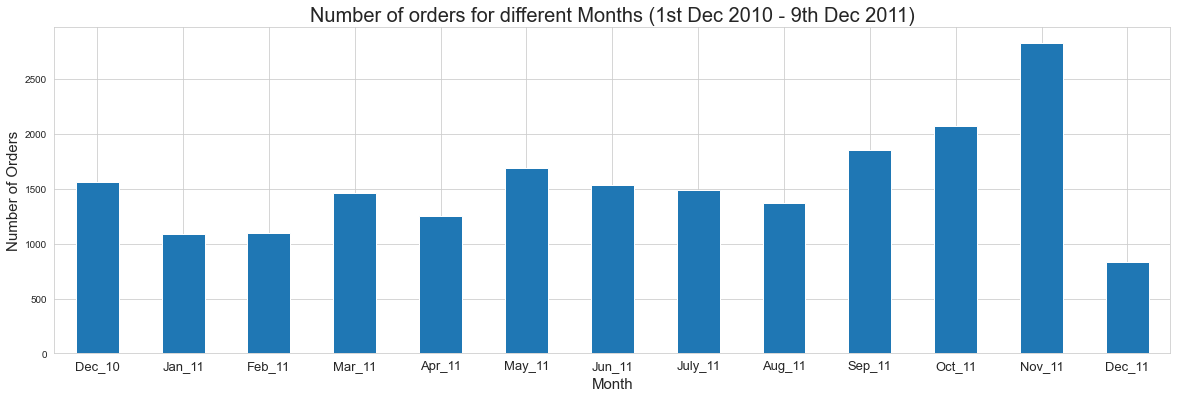

In [137]:
om = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(20,6))
om.set_xlabel('Month',fontsize=15)
om.set_ylabel('Number of Orders',fontsize=15)
om.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=20)
om.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

Task 11. How many orders per day?

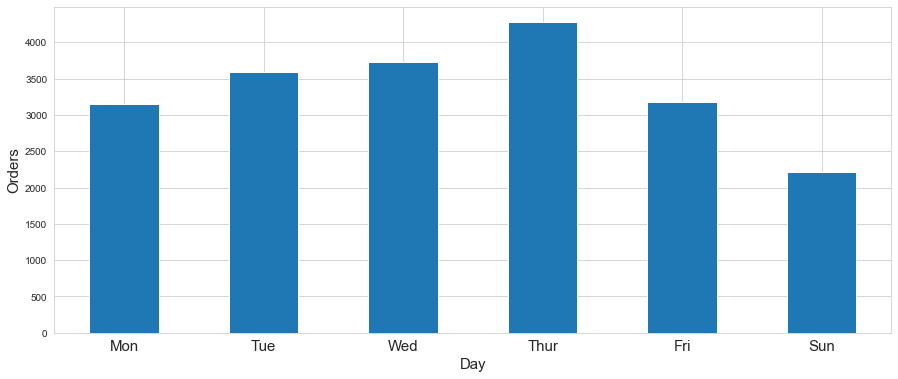

In [136]:
od = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
od.set_xlabel('Day',fontsize=15)
od.set_ylabel('Orders',fontsize=15)
od.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

Task 12. How many orders per hour?

In [ ]:
oh = df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
oh.set_xlabel('Hour',fontsize=13)
oh.set_ylabel('Number of Orders',fontsize=13)
oh.set_title('Number of Hours',fontsize=13)
oh.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

Task 13. How many orders for each country?

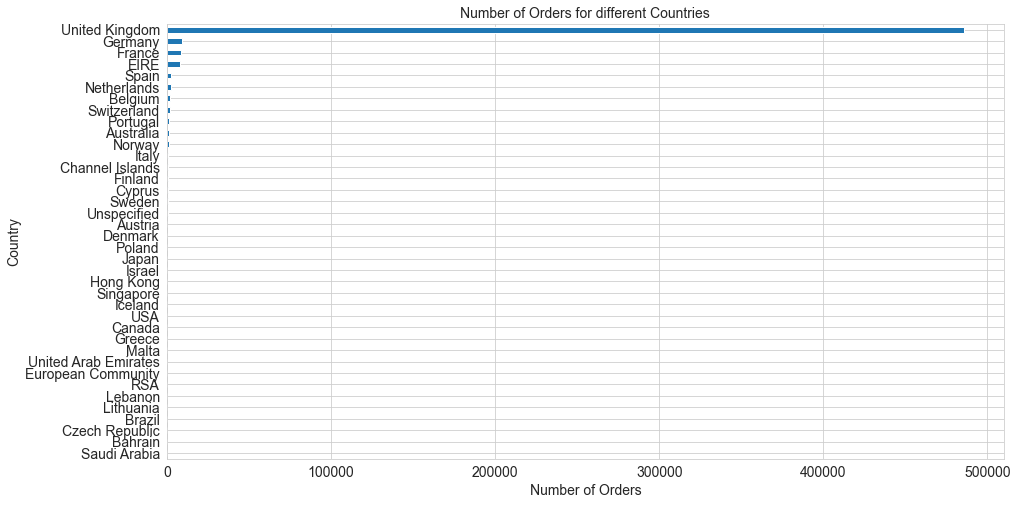

In [142]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()


# number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

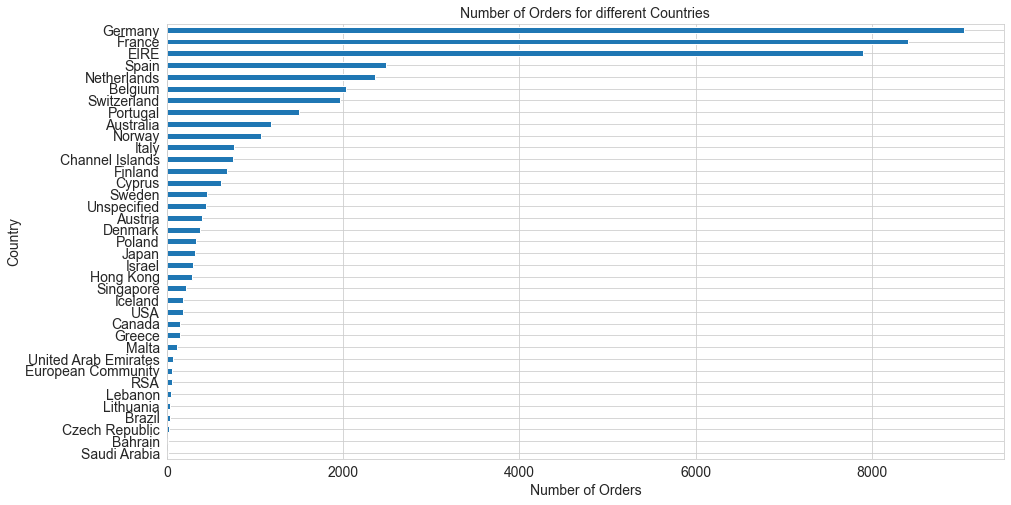

In [143]:
# Without united kingdom
del group_country_orders['United Kingdom']

# number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

Task 14. Orders trend across months

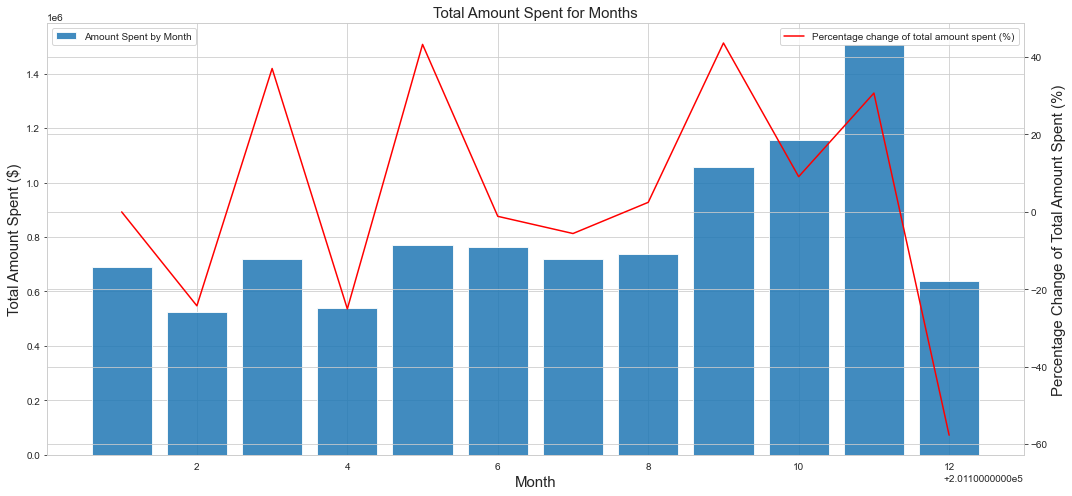

In [146]:

fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:],
        df_new.groupby(by=['year_month'])['Revenue'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:], 
         df_new.groupby(by=['year_month'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

Task 15. How much money spent by each country?

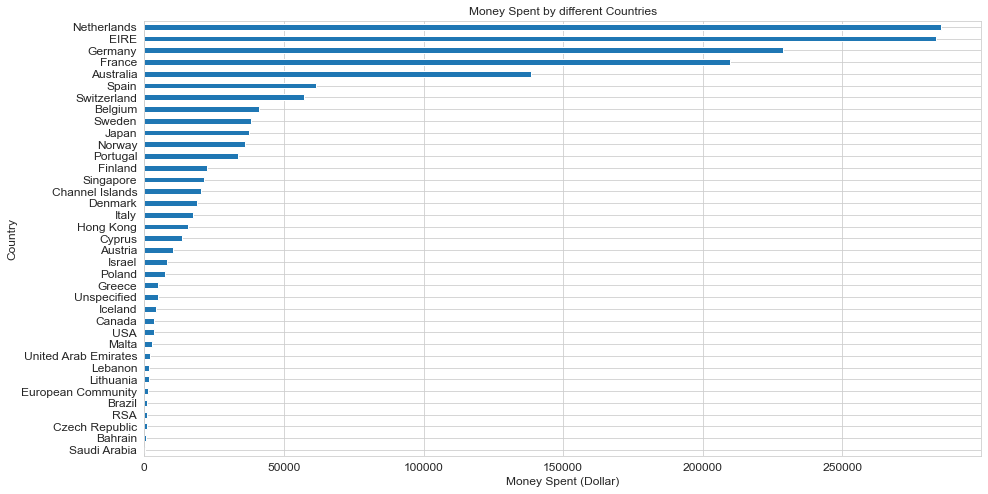

In [147]:
group_country_amount_spent = df_new.groupby('Country')['Revenue'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

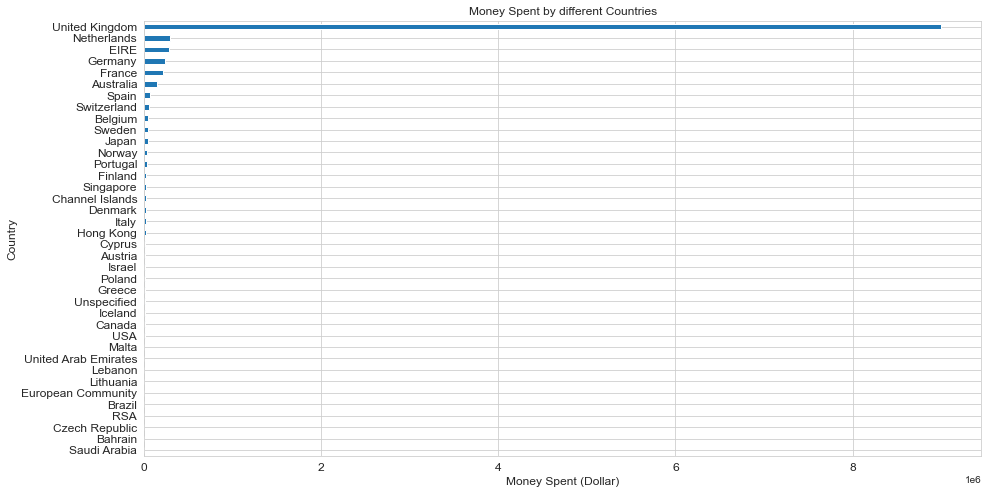

In [148]:
group_country_amount_spent = df_new.groupby('Country')['Revenue'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()